In [1]:
#Titanic Dataset Code to prepare machine Learning Model

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181019015950-0000


In [2]:
#Importing all the libraries

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from matplotlib import pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
# The code was removed by Watson Studio for sharing.

In [29]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df=df_data_3

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [32]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
#Based on Countplot we can see Women Survived More compare to Men

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


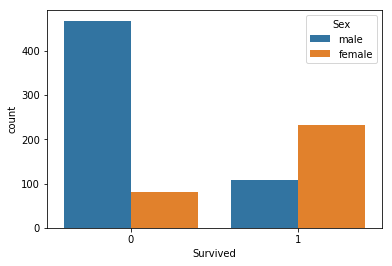

In [35]:
sns.countplot('Survived',hue='Sex',data=df)

In [36]:
#People belongs to Pclass 1 Survived more than pclass 2 and 3, might be higher class people Evacuated First

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


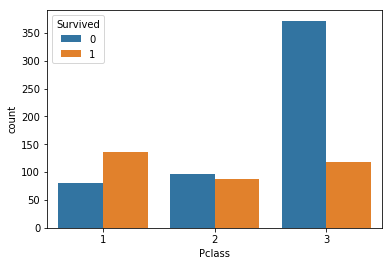

In [37]:
sns.countplot('Pclass',hue='Survived',data=df)

In [38]:
#Checking for Null Columns

In [39]:
pernull=df.isnull().sum()/df.isnull().count()

In [40]:
pernull

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [41]:
#Checking % of Men and Women Survived, we got to know Men survived more compare to Women, men=18%, Women =74% Survival rate

In [42]:
df[df['Sex']=='male'].Survived.sum()/df[df['Sex']=='male'].Survived.count()

0.18890814558058924

In [43]:
df[df['Sex']=='female'].Survived.sum()/df[df['Sex']=='female'].Survived.count()

0.7420382165605095

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


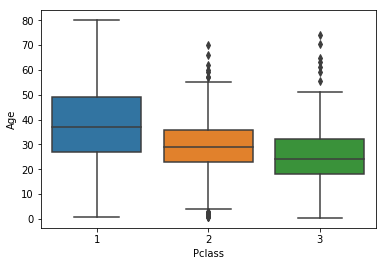

In [44]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [45]:
#Age Column is having Null Values so adding median of every Pclass age to null places in Age Column

In [46]:
def fun(val):
    age=val[0]
    pclass=val[1]
    if pd.isnull(val[0]):
        if pclass==1:
            return 37
        if pclass ==2:
            return 29
        if pclass==3:
            return 24
    else:
        return age       

In [47]:
df['age']=df[['Age','Pclass']].apply(fun,axis=1)

In [48]:
df['age'].isnull().sum()

0

In [49]:
df['age']=df['age'].astype(int)

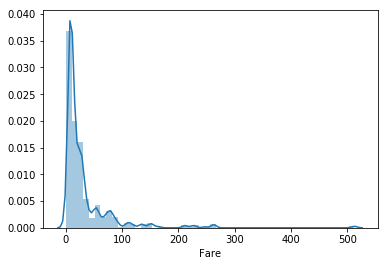

In [50]:
sns.distplot(df['Fare'],bins=50)

In [51]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
#Inserting highest value in Embarked column('S') to null places in Embarked

In [53]:
df['Embarked']=df['Embarked'].fillna('S')

In [54]:
df['Embarked'].isnull().sum()

0

In [55]:
#Concatinating Sibsp and Parch Column and creating Relative Column

In [56]:
df['relative']=df['SibSp']+df['Parch']

In [57]:
df['relative']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: relative, Length: 891, dtype: int64

In [58]:
df.loc[df['relative']>0,'non-relative']=0
df.loc[df['relative']==0, 'non-relative']=1

In [59]:
df['non-relative']=df['non-relative'].astype(int)

In [60]:
df['Fare']=df['Fare'].astype(int)

In [61]:
#Using Label Encoder to convert Categorial to Numerical Values

In [62]:
Labelenc=LabelEncoder()

In [63]:
df['Sex']=Labelenc.fit_transform(df['Sex'])

In [64]:
df['Embarked']=Labelenc.fit_transform(df['Embarked'])


In [65]:
#Deleting Columns

In [66]:
df.drop(['Age','Cabin','Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [67]:
#Final dataframe

In [127]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,age,relative,non-relative
0,1,0,3,1,7,2,22,1,0
1,2,1,1,0,71,0,38,1,0
2,3,1,3,0,7,2,26,0,1
3,4,1,1,0,53,2,35,1,0
4,5,0,3,1,8,2,35,0,1
5,6,0,3,1,8,1,24,0,1
6,7,0,1,1,51,2,54,0,1
7,8,0,3,1,21,2,2,4,0
8,9,1,3,0,11,2,27,2,0
9,10,1,2,0,30,0,14,1,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Fare            891 non-null int64
Embarked        891 non-null int64
age             891 non-null int64
relative        891 non-null int64
non-relative    891 non-null int64
dtypes: int64(9)
memory usage: 62.7 KB


In [69]:
x=df.drop('Survived',axis=1)

In [70]:
y=df['Survived']

In [71]:
x_trn,x_tst,y_trn,y_tst=train_test_split(x,y,random_state=10,test_size=0.2)

In [72]:
randomclf=RandomForestClassifier(n_estimators=25,criterion='gini',max_depth=7,random_state=100)

In [73]:
randomclf.fit(x_trn,y_trn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [74]:
randompred=randomclf.predict(x_tst)

In [75]:
decisiontreeclf=DecisionTreeClassifier(max_depth=7,criterion='entropy',random_state=100,max_features=3)

In [76]:
decisiontreeclf.fit(x_trn,y_trn)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [77]:
decisiontreepred=decisiontreeclf.predict(x_tst)

In [78]:
gausianclf=GaussianNB()

In [79]:
gausianclf.fit(x_trn,y_trn)

GaussianNB(priors=None)

In [80]:
gausianpred=gausianclf.predict(x_tst)

In [81]:
svmclf=SVC(kernel='linear',C=1,gamma=0.1).fit(x_trn,y_trn)

In [82]:
svmpred=svmclf.predict(x_tst)

In [83]:
logisticclf=LogisticRegression().fit(x_trn,y_trn)

In [84]:
logisticpred=logisticclf.predict(x_tst)

In [85]:
confusion_matrix(randompred,y_tst)

array([[107,  13],
       [ 10,  49]])

In [86]:
classification_report(randompred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.91      0.89      0.90       120\n          1       0.79      0.83      0.81        59\n\navg / total       0.87      0.87      0.87       179\n'

In [87]:
accuracy_score(randompred,y_tst)

0.87150837988826813

In [88]:
confusion_matrix(decisiontreepred,y_tst)

array([[103,   9],
       [ 14,  53]])

In [89]:
classification_report(decisiontreepred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.88      0.92      0.90       112\n          1       0.85      0.79      0.82        67\n\navg / total       0.87      0.87      0.87       179\n'

In [90]:
accuracy_score(decisiontreepred,y_tst)

0.87150837988826813

In [91]:
classification_report(gausianpred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.85      0.88      0.87       114\n          1       0.77      0.74      0.76        65\n\navg / total       0.83      0.83      0.83       179\n'

In [92]:
confusion_matrix(gausianpred,y_tst)

array([[100,  14],
       [ 17,  48]])

In [93]:
accuracy_score(gausianpred,y_tst)

0.82681564245810057

In [94]:
classification_report(svmpred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.89      0.84      0.86       124\n          1       0.68      0.76      0.72        55\n\navg / total       0.82      0.82      0.82       179\n'

In [95]:
confusion_matrix(svmpred,y_tst)

array([[104,  20],
       [ 13,  42]])

In [96]:
accuracy_score(svmpred,y_tst)

0.81564245810055869

In [97]:
confusion_matrix(logisticpred,y_tst)

array([[103,  21],
       [ 14,  41]])

In [98]:
classification_report(logisticpred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.88      0.83      0.85       124\n          1       0.66      0.75      0.70        55\n\navg / total       0.81      0.80      0.81       179\n'

In [99]:
accuracy_score(logisticpred,y_tst)

0.8044692737430168

In [100]:
from sklearn.pipeline import Pipeline

In [102]:
!pip install watson-machine-learning-client

    100% |################################| 942kB 773kB/s ta 0:00:011
    100% |################################| 51kB 1.5MB/s eta 0:00:01
    100% |################################| 122kB 2.2MB/s eta 0:00:01
    100% |################################| 51kB 1.6MB/s eta 0:00:01
    100% |################################| 51kB 1.8MB/s eta 0:00:01
    100% |################################| 61kB 2.0MB/s eta 0:00:01
    100% |################################| 8.7MB 111kB/s eta 0:00:01
    100% |################################| 153kB 2.7MB/s eta 0:00:01
    100% |################################| 788kB 982kB/s eta 0:00:01
    100% |################################| 194kB 1.9MB/s eta 0:00:01
    100% |################################| 143kB 2.5MB/s eta 0:00:01
    100% |################################| 61kB 1.8MB/s eta 0:00:01
    100% |################################| 215kB 1.9MB/s eta 0:00:01
    100% |################################| 13.8MB 70kB/s  eta 0:00:01
    100% |##############

In [103]:
steps = [('classifier', randomclf)]

In [104]:
from sklearn import preprocessing

In [105]:
scaler = preprocessing.StandardScaler()

In [106]:
pipeline=Pipeline(steps)

In [107]:
model=pipeline.fit(x_trn,y_trn)

In [108]:
rdmpipe=pipeline.predict(x_tst)

In [109]:
classification_report(rdmpipe,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.91      0.89      0.90       120\n          1       0.79      0.83      0.81        59\n\navg / total       0.87      0.87      0.87       179\n'

In [113]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [114]:

wml_credentials={
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "access_key": "-CvChaVutmx9ej6fksi2uiD7x3AORak_aPzMV9e_eZgK",
  "username": "8be516e1-efb6-402e-9e3d-f530b9896cdb",
  "password": "87ed4d9c-d674-4fb6-9162-6d2384af7940",
  "instance_id": "88a9f44a-4f7a-433f-b823-bcc7c35b28ea"
}


In [115]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [116]:
import json

instance_details = client.service_instance.get_details()
print(json.dumps(instance_details, indent=2))

{
  "entity": {
    "usage": {
      "model_count": {
        "current": 0,
        "limit": 200
      },
      "expiration_date": "2018-11-01T00:00:00.000Z",
      "deployment_count": {
        "current": 0,
        "limit": 5
      },
      "gpu_count": {
        "current": 0,
        "limit": 8
      },
      "computation_time": {
        "current": 0,
        "limit": 180000
      },
      "prediction_count": {
        "current": 0,
        "limit": 5000
      },
      "capacity_units": {
        "current": 0,
        "limit": 180000000
      }
    },
    "status": "Active",
    "tags": null,
    "plan_id": "3f6acf43-ede8-413a-ac69-f8af3bb0cbfe",
    "deployments": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/deployments"
    },
    "plan": "lite",
    "region": "eu-gb",
    "source": "Bluemix",
    "organization_guid": "N/A",
    "space_guid": "N/A",
    "account": {
      "type": "TRIAL",
      "name": "IBM",
      "id": "9a

In [117]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Tiatnic", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "ankpal57@in.ibm.com",
               client.repository.ModelMetaNames.NAME: "Titanic prediction model"}

In [118]:


models_details = client.repository.list_models()



----  ----  -------  ---------
GUID  NAME  CREATED  FRAMEWORK
----  ----  -------  ---------


In [119]:
published_model = client.repository.store_model(model=model, meta_props=model_props, \
                                                training_data=x_trn, training_target=y_trn)

In [120]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "entity": {
    "learning_iterations_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/published_models/c22e40d8-3367-4b56-90f1-f0e35ab5eb9b/learning_iterations",
    "runtime_environment": "python-3.5",
    "evaluation_metrics_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/published_models/c22e40d8-3367-4b56-90f1-f0e35ab5eb9b/evaluation_metrics",
    "input_data_schema": {
      "features": {
        "fields": [
          {
            "name": "PassengerId",
            "type": "int64"
          },
          {
            "name": "Pclass",
            "type": "int64"
          },
          {
            "name": "Sex",
            "type": "int64"
          },
          {
            "name": "Fare",
            "type": "int64"
          },
          {
            "name": "Embarked",
            "type": "int64"
          },
          {
            "name": "age",
            "type": "int64"
        

In [121]:
loaded_model = client.repository.load(published_model_uid)

In [122]:
created_deployment = client.deployments.create(published_model_uid, "Deployment of locally created scikit model")



#######################################################################################

Synchronous deployment creation for uid: 'c22e40d8-3367-4b56-90f1-f0e35ab5eb9b' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='37a4da71-d23e-4170-bceb-026f0ec2dae4'
------------------------------------------------------------------------------------------------




In [123]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/deployments/37a4da71-d23e-4170-bceb-026f0ec2dae4/online


In [124]:
deployments = client.deployments.get_details()

print(json.dumps(deployments, indent=2))

{
  "resources": [
    {
      "entity": {
        "description": "Description of deployment",
        "scoring_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/deployments/37a4da71-d23e-4170-bceb-026f0ec2dae4/online",
        "name": "Deployment of locally created scikit model",
        "status_details": {
          "status": "DEPLOY_SUCCESS"
        },
        "deployable_asset": {
          "type": "model",
          "name": "Titanic prediction model",
          "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/published_models/c22e40d8-3367-4b56-90f1-f0e35ab5eb9b",
          "guid": "c22e40d8-3367-4b56-90f1-f0e35ab5eb9b",
          "created_at": "2018-10-19T06:10:18.916Z"
        },
        "runtime_environment": "python-3.5",
        "status": "DEPLOY_SUCCESS",
        "deployed_version": {
          "url": "https://eu-gb.ml.cloud.ibm.com/v3/ml_assets/models/c22e40d8-3367-4b56-90f1-f0e35ab5eb9b/v

In [125]:
deployment_url = client.deployments.get_url(created_deployment)

print(deployment_url)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/deployments/37a4da71-d23e-4170-bceb-026f0ec2dae4


In [126]:


client.repository.list_models()



------------------------------------  ------------------------  ------------------------  -----------------
GUID                                  NAME                      CREATED                   FRAMEWORK
c22e40d8-3367-4b56-90f1-f0e35ab5eb9b  Titanic prediction model  2018-10-19T06:10:11.497Z  scikit-learn-0.19
------------------------------------  ------------------------  ------------------------  -----------------


In [1]:
url = 'https://eu-gb.ml.cloud.ibm.com'
username = '8be516e1-efb6-402e-9e3d-f530b9896cdb'
password = '87ed4d9c-d674-4fb6-9162-6d2384af7940'
scoring_endpoint = 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/88a9f44a-4f7a-433f-b823-bcc7c35b28ea/deployments/37a4da71-d23e-4170-bceb-026f0ec2dae4/online'

import urllib3, requests, json

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181019134839-0000


In [2]:
headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(username, password))
path = '{}/v3/identity/token'.format(url)
response = requests.get(path, headers=headers)
mltoken = json.loads(response.text).get('token')

In [9]:
# Call scoring endpoint with data payload
scoring_header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}
payload = {"fields": ["PassengerId","Sex","Pclass","Fare","Embarked","age","relative","non-relative"],"values": [[1, 1,1,20,1,22,1,0]]}

scoring = requests.post(scoring_endpoint, json=payload, headers=scoring_header)
scoring.text

'{"fields": ["prediction", "probability"], "values": [[0, [0.6645033673803579, 0.33549663261964235]]]}\n'